In [9]:
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import numpy as np
from polan import fp2poly,plot_poly

<h1>In this Notebook</h1>
<ul style="font-size:24px">
    <li><a href="#CHX">Comparison of cycloheximide concentrations</a></li>
    <li><a href="#libraries">Comparison of library preparation methods</a></li>
</ul>

In [2]:
#define a reference profile based on a representative polysome experimental profile
ref_peaks = [0.003, 0.0051, 0.026, 0.018, 0.0205, 0.0155, 0.012, 0.0085, 0.008, 0.006, 0.005, 0.0035, 0.002, 0.0015, 0.001, 0.0005, 0.0002, 5e-05]
ref_peaks = ref_peaks/ np.sum(ref_peaks)
x_ref,y_ref = plot_poly(ref_peaks)

<a name="CHX"></a>
<h2>Cycloheximide Series</h2>
<p>This analyses data generated by <a href="https://www.ncbi.nlm.nih.gov/pubmed/25056308" target=_blank>Gerashchenko and Gladyshev (2014)</a> using a cycloheximide concentration series. The dataset is <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE59573" target=_Blank>GSE59573</a>. "1x CHX" refers to the standard final concentration of 100 &mu;g/ml.</p>

In [5]:
#read in the CHX concentration series data and produce the peak information
poly_vols = []
all_dats = pd.read_csv('Data/GSE59573_all_CHX_concs.csv')
for col in range(1,all_dats.shape[1]):
    dats = all_dats.iloc[:,[0,col]]
    dats.columns = ['ORF','Ribo_Prints']
    poly_vols.append(fp2poly(dats,from_file=False))

Using reference mRNA data.
Using reference mRNA data.
Using reference mRNA data.
Using reference mRNA data.
Using reference mRNA data.
Using reference mRNA data.
Using reference mRNA data.


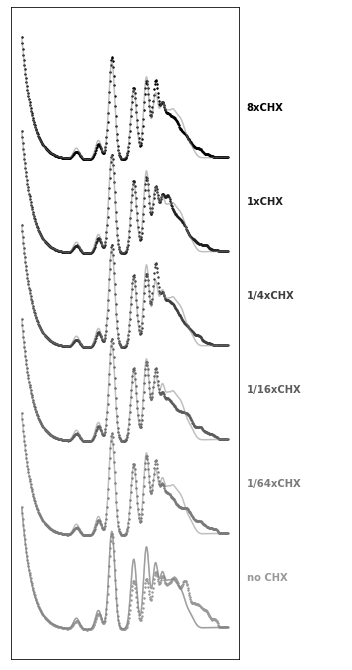

In [10]:
#plot the results
labels = list(all_dats.columns[1:])
labels = [l.replace('_','/') for l in labels]
labels = [l.replace('0/','no ') for l in labels]
colors=plt.cm.gist_yarg(np.linspace(0.4,1,len(poly_vols)))
fig,ax = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios': [3, 1]},figsize = (6,12))
ax[0].set_prop_cycle(cycler(color=colors))
ax[0].plot(x_ref,y_ref,c='grey', label='experimental',alpha = 0.5)
offset_by = 5
offset = 0
for trace_no in range(len(poly_vols)):    
    ax[0].plot(x_ref,y_ref+offset ,c='grey', label='experimental',alpha = 0.5)    
    x,y = plot_poly(poly_vols[trace_no])
    ax[0].scatter(x,y+offset,s=2,label = labels[trace_no])
    ax[1].text(-0.3,offset+max(y_ref[20:])/2,labels[trace_no],color = colors[trace_no],
              fontdict={'weight':'bold'})
    offset += offset_by
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].axis('off')
#plt.savefig('CHX_series.svg')
plt.show()

<a name="libraries"></a>
<h2>Library preparation protocols</h2>
<p>This analyses data from <a href="https://www.ncbi.nlm.nih.gov/pubmed/27450428" target=_blank>Lecanda <i>et al.</i> (2016).</a> which tests a variety of library preparation protocols. The dataset used is <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE84746" target=_blank>GSE84746</a>.</p>

In [7]:
#analysis of library prep series
poly_vols = []
for file in ['GSE84746_DualLigation.csv','GSE84746_3N.csv',
             'GSE84746_4N.csv','GSE84746_4N_low.csv',
             'GSE84746_nonrand.csv','GSE84746_nonrand_low.csv']:
    poly_vols.append(fp2poly(file))
    

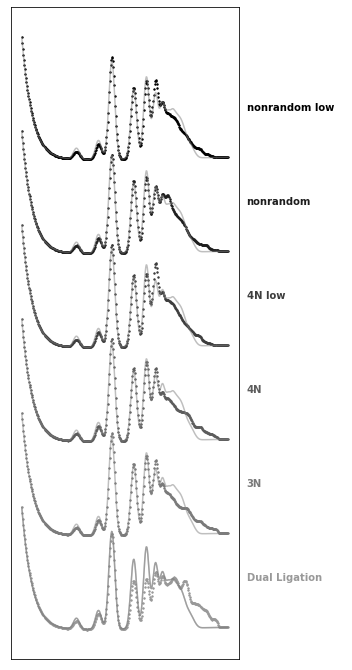

In [11]:
#plot the results
labels = ['Dual Ligation','3N','4N','4N low','nonrandom','nonrandom low']
colors=plt.cm.gist_yarg(np.linspace(0.4,1,len(poly_vols)))
fig,ax = plt.subplots(1,2,sharey=True,gridspec_kw={'width_ratios': [3, 1]},figsize = (6,12))
ax[0].set_prop_cycle(cycler(color=colors))
ax[0].plot(x_ref,y_ref,c='grey', label='experimental',alpha = 0.5)
offset_by = 5
offset = 0
for trace_no in range(len(poly_vols)):    
    ax[0].plot(x_ref,y_ref+offset ,c='grey', label='experimental',alpha = 0.5)    
    x,y = plot_poly(poly_vols[trace_no])
    ax[0].scatter(x,y+offset,s=2,label = labels[trace_no])
    ax[1].text(-0.3,offset+max(y_ref[20:])/2,labels[trace_no],color = colors[trace_no],
              fontdict={'weight':'bold'})
    offset += offset_by
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[1].axis('off')
#plt.savefig('library_series.svg')
plt.show()